In [1]:
import pandas as pd

In [28]:
df = pd.read_csv('GSE77399_non_normalized.txt',sep='\t')
df.shape

(94, 26)

In [173]:
fpr_list=[]
tpr_list =[]
aucs =[]
accs=[]
exps=[]

In [101]:
#lnc_interest = ['ROR', 'TUG1', 'HOTAIR', 'H19', 'GAS5']
lnc_interest =['EGO', 'ROR', 'TUG1', 'SOX2OT', 'HOTAIR', 'H19', 'GAS5','LINCRNA-VLDLR']

In [102]:
df_interest = df[df['ID_REF'].isin(lnc_interest)]
df_interest

,ID_REF,SAMPLE 1,SAMPLE 2,SAMPLE 3,SAMPLE 4,SAMPLE 5,SAMPLE 6,SAMPLE 7,SAMPLE 8,SAMPLE 9,...,SAMPLE 16,SAMPLE 17,SAMPLE 18,SAMPLE 19,SAMPLE 20,SAMPLE 21,SAMPLE 22,SAMPLE 23,SAMPLE 24,SAMPLE 25
23,EGO,25.7,25.7,26.5,25.8,26.7,24.9,25.3,25.3,26.0,...,27.4,27.2,26.7,27.9,26.7,22.9,23.0,23.9,24.1,25.5
24,GAS5,26.6,27.3,26.9,26.6,27.5,26.0,25.8,26.2,26.4,...,28.3,29.0,29.7,28.7,27.9,23.4,23.0,24.2,24.0,25.6
26,H19,26.6,26.3,25.6,25.9,25.9,25.9,29.7,24.4,29.0,...,33.8,32.8,37.6,34.3,37.6,32.4,30.1,33.7,33.2,33.7
30,HOTAIR,27.3,29.1,27.0,27.1,27.5,29.3,25.6,26.6,27.1,...,28.6,NaN,31.6,30.7,27.4,22.9,23.1,24.2,23.7,25.5
40,LINCRNA-VLDLR,26.8,27.4,26.6,26.9,28.0,27.8,25.8,27.1,26.9,...,28.9,28.2,28.9,29.0,26.4,23.9,23.5,24.0,24.4,25.7
63,ROR,27.7,29.2,27.2,27.5,27.7,29.3,26.2,27.5,28.0,...,29.0,29.8,30.0,32.5,26.9,23.9,23.9,24.2,24.1,25.8
66,SOX2OT,27.2,29.4,27.8,27.2,27.2,29.8,28.9,28.9,27.6,...,31.8,35.0,39.9,34.9,35.4,26.9,25.3,31.6,29.8,30.1
75,TUG1,23.6,23.9,24.3,24.1,24.8,23.1,24.9,23.8,23.6,...,29.4,27.6,30.3,26.5,29.8,23.9,22.9,25.9,24.7,26.5


In [103]:
df_interest.index = ['EGO','GAS5','H19','HOTAIR','LINCRNA-VLDLR','ROR','SOX2OT','TUG1']

In [104]:
df_interest= df_interest.transpose()
df_interest.shape

(26, 8)

In [105]:
df_interest.drop(index=['ID_REF'],inplace=True)

In [106]:
df_interest

,EGO,GAS5,H19,HOTAIR,LINCRNA-VLDLR,ROR,SOX2OT,TUG1
SAMPLE 1,25.7,26.6,26.6,27.3,26.8,27.7,27.2,23.6
SAMPLE 2,25.7,27.3,26.3,29.1,27.4,29.2,29.4,23.9
SAMPLE 3,26.5,26.9,25.6,27,26.6,27.2,27.8,24.3
SAMPLE 4,25.8,26.6,25.9,27.1,26.9,27.5,27.2,24.1
SAMPLE 5,26.7,27.5,25.9,27.5,28,27.7,27.2,24.8
SAMPLE 6,24.9,26,25.9,29.3,27.8,29.3,29.8,23.1
SAMPLE 7,25.3,25.8,29.7,25.6,25.8,26.2,28.9,24.9
SAMPLE 8,25.3,26.2,24.4,26.6,27.1,27.5,28.9,23.8
SAMPLE 9,26,26.4,29,27.1,26.9,28,27.6,23.6
SAMPLE 10,26.3,27.2,27.7,27.6,28.3,28.7,29.2,24.3


In [107]:
target = [1]*13 + [0]*12
target

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [108]:
df_interest['Target'] = target
df_interest['HOTAIR'] = df_interest['HOTAIR'].fillna((df_interest['HOTAIR'].mean()))
df_interest

,EGO,GAS5,H19,HOTAIR,LINCRNA-VLDLR,ROR,SOX2OT,TUG1,Target
SAMPLE 1,25.7,26.6,26.6,27.30,26.8,27.7,27.2,23.6,1
SAMPLE 2,25.7,27.3,26.3,29.10,27.4,29.2,29.4,23.9,1
SAMPLE 3,26.5,26.9,25.6,27.00,26.6,27.2,27.8,24.3,1
SAMPLE 4,25.8,26.6,25.9,27.10,26.9,27.5,27.2,24.1,1
SAMPLE 5,26.7,27.5,25.9,27.50,28,27.7,27.2,24.8,1
SAMPLE 6,24.9,26,25.9,29.30,27.8,29.3,29.8,23.1,1
SAMPLE 7,25.3,25.8,29.7,25.60,25.8,26.2,28.9,24.9,1
SAMPLE 8,25.3,26.2,24.4,26.60,27.1,27.5,28.9,23.8,1
SAMPLE 9,26,26.4,29,27.10,26.9,28,27.6,23.6,1
SAMPLE 10,26.3,27.2,27.7,27.60,28.3,28.7,29.2,24.3,1


In [109]:
X_df = df_interest.copy()
X = X_df.drop(columns=['Target'])
X = X.values
X.shape

(25, 8)

In [114]:
from sklearn.preprocessing import normalize
X = normalize(X, norm='l2',axis=1, copy=True, return_norm=False)

In [50]:
from sklearn.cluster import AgglomerativeClustering


In [115]:
clustering = AgglomerativeClustering(n_clusters=2).fit(X)
labels = clustering.labels_.tolist()
labels

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [116]:
#predicted = [1]*13 + [0]*7 + [1]*5
predicted = labels[:]

In [117]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
fpr,tpr,_= roc_curve(target,predicted)
auc = roc_auc_score(target,predicted)
acc = accuracy_score(target,predicted)
print ("AUC=",auc, "ACCURACY=",acc)

AUC= 0.9230769230769231 ACCURACY= 0.92


In [96]:
from matplotlib import pyplot as plt
%matplotlib inline

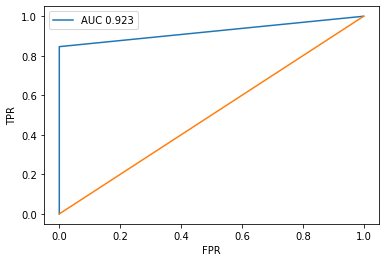

In [118]:
plt.plot(fpr,tpr,label='AUC '+str(round(auc,3)))
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [174]:
#Exp-1
lnc_interest =['EGO','GAS5','H19','HOTAIR','LINCRNA-VLDLR','ROR','SOX2OT','TUG1']
df_interest = df[df['ID_REF'].isin(lnc_interest)]
df_interest.index = ['EGO','GAS5','H19','HOTAIR','LINCRNA-VLDLR','ROR','SOX2OT','TUG1']
df_interest= df_interest.transpose()
df_interest.drop(index=['ID_REF'],inplace=True)
target = [1]*13 + [0]*12

df_interest['HOTAIR'] = df_interest['HOTAIR'].fillna((df_interest['HOTAIR'].mean()))
X = df_interest.values
X = normalize(X, norm='l2',axis=1, copy=True, return_norm=False)

clustering = AgglomerativeClustering(n_clusters=2).fit(X)
labels = clustering.labels_.tolist()
labels

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [175]:
predicted = [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fpr,tpr,_= roc_curve(target,predicted)
auc = roc_auc_score(target,predicted)
acc = accuracy_score(target,predicted)
fpr_list.append(fpr)
tpr_list.append(tpr)
aucs.append(auc)
accs.append(acc)
exps.append(lnc_interest)
print ("Exp1-AUC=",auc, "ACCURACY=",acc)

Exp1-AUC= 0.9230769230769231 ACCURACY= 0.92


In [162]:
print(fpr,tpr)

[0.         0.16666667 1.        ] [0.         0.84615385 1.        ]


In [176]:
#Exp-2
lnc_interest =['EGO','GAS5','H19','HOTAIR','ROR','SOX2OT','TUG1']
df_interest = df[df['ID_REF'].isin(lnc_interest)]
df_interest.index = lnc_interest
df_interest= df_interest.transpose()
df_interest.drop(index=['ID_REF'],inplace=True)
target = [1]*13 + [0]*12

df_interest['HOTAIR'] = df_interest['HOTAIR'].fillna((df_interest['HOTAIR'].mean()))
X = df_interest.values
X = normalize(X, norm='l2',axis=1, copy=True, return_norm=False)

clustering = AgglomerativeClustering(n_clusters=2).fit(X)
labels = clustering.labels_.tolist()
labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1]

In [137]:
predicted = [int(i==0) for i in labels]
predicted

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]

In [177]:
predicted = [int(i==0) for i in labels]
fpr,tpr,_= roc_curve(target,predicted)
auc = roc_auc_score(target,predicted)
acc = accuracy_score(target,predicted)

fpr_list.append(fpr)
tpr_list.append(tpr)
aucs.append(auc)
accs.append(acc)
exps.append(lnc_interest)

print ("Exp2-AUC=",auc, "ACCURACY=",acc)
print (fpr,tpr)

Exp2-AUC= 0.7916666666666666 ACCURACY= 0.8
[0.         0.41666667 1.        ] [0. 1. 1.]


In [178]:
#Exp-3
lnc_interest =['GAS5','H19','HOTAIR','ROR','TUG1']
df_interest = df[df['ID_REF'].isin(lnc_interest)]
df_interest.index = lnc_interest
df_interest= df_interest.transpose()
df_interest.drop(index=['ID_REF'],inplace=True)
target = [1]*13 + [0]*12

df_interest['HOTAIR'] = df_interest['HOTAIR'].fillna((df_interest['HOTAIR'].mean()))
X = df_interest.values
X = normalize(X, norm='l2',axis=1, copy=True, return_norm=False)

clustering = AgglomerativeClustering(n_clusters=2).fit(X)
labels = clustering.labels_.tolist()
labels

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

In [179]:
predicted = [int(i==0) for i in labels]
fpr,tpr,_= roc_curve(target,predicted)
auc = roc_auc_score(target,predicted)
acc = accuracy_score(target,predicted)

fpr_list.append(fpr)
tpr_list.append(tpr)
aucs.append(auc)
accs.append(acc)
exps.append(lnc_interest)

print ("Exp3-AUC=",auc, "ACCURACY=",acc)

Exp3-AUC= 0.8397435897435898 ACCURACY= 0.84


In [180]:
#Exp-4
lnc_interest =['GAS5','H19','HOTAIR','LINCRNA-VLDLR','ROR','TUG1']
df_interest = df[df['ID_REF'].isin(lnc_interest)]
df_interest.index = lnc_interest
df_interest= df_interest.transpose()
df_interest.drop(index=['ID_REF'],inplace=True)
target = [1]*13 + [0]*12

df_interest['HOTAIR'] = df_interest['HOTAIR'].fillna((df_interest['HOTAIR'].mean()))
X = df_interest.values
X = normalize(X, norm='l2',axis=1, copy=True, return_norm=False)

clustering = AgglomerativeClustering(n_clusters=2).fit(X)
labels = clustering.labels_.tolist()
labels

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

In [181]:
predicted = [int(i==0) for i in labels]
fpr,tpr,_= roc_curve(target,predicted)
auc = roc_auc_score(target,predicted)
acc = accuracy_score(target,predicted)

fpr_list.append(fpr)
tpr_list.append(tpr)
aucs.append(auc)
accs.append(acc)
exps.append(lnc_interest)

print ("Exp4-AUC=",auc, "ACCURACY=",acc)

Exp4-AUC= 0.8397435897435898 ACCURACY= 0.84


In [182]:
len(fpr_list)

4

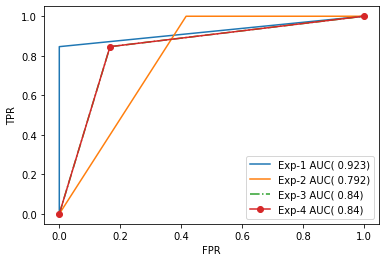

In [184]:
shapes=['-','-','-.','-o']
for i in range(len(exps[:])):
    plt.plot(fpr_list[i],tpr_list[i],shapes[i],label='Exp-'+str(i+1)+' AUC( '+str(round(aucs[i],3))+')')
#plt.plot(0.5,0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [159]:
tpr_list[0],tpr_list[1]

(array([0.        , 0.84615385, 1.        ]),
 array([0.        , 0.84615385, 1.        ]))

In [185]:
exps

[['EGO', 'GAS5', 'H19', 'HOTAIR', 'LINCRNA-VLDLR', 'ROR', 'SOX2OT', 'TUG1'],
 ['EGO', 'GAS5', 'H19', 'HOTAIR', 'ROR', 'SOX2OT', 'TUG1'],
 ['GAS5', 'H19', 'HOTAIR', 'ROR', 'TUG1'],
 ['GAS5', 'H19', 'HOTAIR', 'LINCRNA-VLDLR', 'ROR', 'TUG1']]